### Import Necessary Module and Set Path 

In [1]:
import sqlite3 as lite
import os
import sys
import collections
from pyne import nucname
sys.path.insert(0, '../scripts/')
jupyter_directory = os.getcwd()

In [2]:
import analysis as an

## Run Cyclus Input file

In [4]:
! rm cyclus.sqlite
! cyclus eg01-eg24-complex.xml

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

### The output file should be named 
         
          cyclus.sqlite

In [5]:
filename = 'cyclus.sqlite'
# Wait for the complete message to move on
cur = an.get_cursor(filename)
# get simulation time info
init_year, init_month, duration, timestep = an.get_timesteps(cur)

# get fuel mass timeseries
fuel_dict = an.fuel_usage_timeseries(cur, ['uox', 'sfr_fuel'])
an.stacked_bar_chart(fuel_dict, timestep,
                  'Years', 'Mass[MTHM]',
                  'Total Fuel Mass vs Time',
                  'total_fuel',
                  init_year)

# prints net capacity and number of reactor timeseries
an.plot_power(cur)

# get tailings mass timeseries
agent_ids = an.get_agent_ids(cur, 'enrichment')
tailings = an.facility_commodity_flux(cur, agent_ids,
                                        ['tailings'], True)
an.stacked_bar_chart(tailings, timestep,
                  'Year', 'Mass [MTHM]',
                  'Tailings vs Time',
                  'tailings', init_year)

# natural uranium demand
nat_u = collections.OrderedDict()
nat_u['nat_u'] = an.nat_u_timeseries(cur)
an.stacked_bar_chart(nat_u, timestep,
                     'Years', 'Natural Uranium Mass',
                     'Natural Uranium Demand vs Time',
                     'nat_u', init_year)

# uranium utilization
dictionary = {}
dictionary['uranium_utilization'] = an.u_util_calc(cur)
an.stacked_bar_chart(dictionary, timestep,
                     'Years', 'U Utilization Factor',
                     'U Utilization vs Time',
                     'u_util', init_year)

# get reprocessed material flow
agent_ids = an.get_agent_ids(cur, 'separations')
combined = an.facility_commodity_flux(cur, agent_ids, ['uox_TRU', 'sfr_TRU'], True)
from_spent_uox = an.facility_commodity_flux(cur, agent_ids, ['uox_TRU'], True)
from_spent_mox = an.facility_commodity_flux(cur, agent_ids, ['sfr_TRU'], True)
an.stacked_bar_chart(combined, timestep, 'Years', 'Mass[MTHM]',
                  'Total TRU reprocessed outflux vs Time', 'combined',
                  init_year)
an.stacked_bar_chart(from_spent_uox, timestep, 'Years', 'Mass[MTHM]',
                  'TRU reprocessed from spent UOX vs Time', 'from_spent_uox',
                  init_year)
an.stacked_bar_chart(from_spent_mox, timestep, 'Years', 'Mass[MTHM]',
                  'TRU reprocessed from spent MOX vs Time', 'from_spent_mox',
                  init_year)

print('Finished!')

sink_source_facilities has no values
sink_source_facilities has no values
The Average Fuel Utilization Factor is: 
0.155286730613
Finished!


In [10]:
# Number of Reactors Deployed
cur = an.get_cursor(filename)
lwr = cur.execute('SELECT count(*) FROM agententry '
                  'WHERE prototype = "lwr"').fetchone()
print('The Number of LWRs Deployed:')
print(lwr[0])

sfr = cur.execute('SELECT count(*) FROM agententry '
                  'WHERE prototype = "fr"').fetchone()
print('The Number of FRs Deployed:')
print(sfr[0])

The Number of LWRs Deployed:
391
The Number of FRs Deployed:
2041


In [11]:
# Fresh and Spent Fuel Composition
cur = an.get_cursor(filename)

sfr_fuel_qualid = cur.execute('SELECT qualid FROM transactions '
                              'INNER JOIN resources ON '
                              'resources.resourceid = transactions.resourceid '
                              'WHERE commodity = "sfr_fuel"').fetchone()
fresh_sfr_mox_comp = cur.execute('SELECT nucid, massfrac FROM compositions '
                                 'WHERE qualid = ' + str(sfr_fuel_qualid[0])).fetchall()
print('Composition for fresh sfr fuel: ')
for isotope in fresh_sfr_mox_comp:
    print(nucname.name(isotope[0]) + ': ' + str(isotope[1] * 100) + ' %')

print('\n \n')

sfr_waste_comp = cur.execute('SELECT nucid, massfrac FROM recipes '
                             'LEFT OUTER JOIN compositions '
                             'ON recipes.qualid = compositions.qualid '
                             'WHERE recipe = "sfr_waste_recipe"').fetchall()
print('Composition for sfr spent fuel: ')
for isotope in sfr_waste_comp:
    print(nucname.name(isotope[0]) + ': ' + str(isotope[1] * 100) + ' %')

Composition for fresh sfr fuel: 
U232: 8.251413836213829e-08 %
U233: 1.8267817354113106e-07 %
U234: 0.014183553277000016 %
U235: 0.657768668601456 %
U236: 0.4708047231546309 %
U238: 84.9572427897746 %
Np237: 0.6575939269214587 %
Pu238: 0.3146562839163647 %
Pu239: 6.547873807427567 %
Pu240: 3.136848216227294 %
Pu241: 1.8976528661777947 %
Pu242: 0.9325269424504185 %
Pu244: 3.0925912332086166e-05 %
Am241: 0.06954822099672987 %
Am242M: 0.0009211927952601164 %
Am243: 0.21416062381412654 %
Cm242: 0.027957456523596214 %
Cm243: 0.0008322840980884815 %
Cm244: 0.09242152229923964 %
Cm245: 0.006176546958610714 %
Cm246: 0.0007875583119542776 %
Cm247: 1.0794865085453715e-05 %
Cm248: 8.303040755965326e-07 %
Cm250: 4.621076114961982e-15 %

 

Composition for sfr spent fuel: 
H3: 0.0 %
He4: 0.0 %
Kr81: 1.5299332870879223e-09 %
Kr85: 0.0 %
Sr90: 0.08869178475872014 %
Tc99: 0.2771618273710004 %
I129: 0.08869178475872014 %
Cs134: 0.0 %
Cs135: 0.4767183430781207 %
Cs137: 0.4212859776039206 %
Pb206: 1.3414

In [12]:
outstring = ''
outstring += 'Initial Year:' + str(init_year) + '\n'
outstring += 'Initial Month:' + str(init_month) + '\n'
outstring += 'Duration in Months:' + str(duration) + '\n'
outstring += 'End Year:' + str(int(init_year + duration/12)) + '\n'

outstring += '\n'

outstring += 'Total Fuel Used: [MTHM]' + '\n'
first = True
for key in fuel_dict:
    outstring += '\t' + key + ': ' + str(max(fuel_dict[key])) + '\n'
    if first:
        total = fuel_dict[key]
        first = False
    else:
        total = [x + y for x, y in zip(total, fuel_dict[key])]
outstring += '\t' + key + ': ' + str(max(total)) + '\n'

outstring += '\n'

outstring += 'Total Natural Uranium [MTHM]' + '\n'
outstring += '\t' + str(max(nat_u['nat_u'])) + '\n'

outstring += 'Total Tailings [MTHM]' + '\n'
outstring += '\t' + str(max(tailings['tailings'])) + '\n'

outstring += '\n'

outstring += 'Average Fuel Utilization Factor (Fuel/NatU):' + '\n'
outstring += '\t' + str(sum(dictionary['uranium_utilization']) / len(dictionary['uranium_utilization'])) + '\n'

outstring += '\n'

outstring += 'Plutonium reprocessed: [MTHM]' + '\n'
first = True
for key in combined:
    outstring += '\t' + key + ': ' + str(max(combined[key])) + '\n'
    if first:
        total = combined[key]
        first = False
    else:
        total = [x + y for x, y in zip(total, combined[key])]
outstring += '\t Total: ' + str(max(total)) + '\n'

outstring += '\n' 

outstring += 'Reactors Deployed:' + '\n'
outstring += '\t LWR: ' + str(lwr[0]) + '\n'
outstring += '\t FR: ' + str(sfr[0]) + '\n'

outstring += '\n'

outstring += 'Compositions' + '\n'
outstring += '\t Composition for fresh sfr fuel: ' + '\n'
for isotope in fresh_sfr_mox_comp:
    outstring += '\t\t ' + nucname.name(isotope[0]) + ': ' + str(isotope[1] * 100) + ' %' + '\n'
    
outstring += '\t Composition for fresh sfr spent fuel: ' + '\n'
for isotope in sfr_waste_comp:
    outstring += '\t\t' + nucname.name(isotope[0]) + ': ' + str(isotope[1] * 100) + ' %' + '\n'

    
print(outstring)
if 'simulation_results':
    with open('simulation_results', 'w') as output:
        output.write(outstring)

Initial Year:1959
Initial Month:1
Duration in Months:3024
End Year:2211

Total Fuel Used: [MTHM]
	uox: 625005.68
	sfr_fuel: 423266.676
	sfr_fuel: 1048272.356

Total Natural Uranium [MTHM]
	4373652.24754
Total Tailings [MTHM]
	3748646.56754

Average Fuel Utilization Factor (Fuel/NatU):
	0.155312906861

Plutonium reprocessed: [MTHM]
	uox_TRU: 7156.63341375
	sfr_TRU: 70033.3196414
	 Total: 77189.9530551

Reactors Deployed:
	 LWR: 391
	 FR: 2041

Compositions
	 Composition for fresh sfr fuel: 
		 U232: 8.251413836213829e-08 %
		 U233: 1.8267817354113106e-07 %
		 U234: 0.014183553277000016 %
		 U235: 0.657768668601456 %
		 U236: 0.4708047231546309 %
		 U238: 84.9572427897746 %
		 Np237: 0.6575939269214587 %
		 Pu238: 0.3146562839163647 %
		 Pu239: 6.547873807427567 %
		 Pu240: 3.136848216227294 %
		 Pu241: 1.8976528661777947 %
		 Pu242: 0.9325269424504185 %
		 Pu244: 3.0925912332086166e-05 %
		 Am241: 0.06954822099672987 %
		 Am242M: 0.0009211927952601164 %
		 Am243: 0.21416062381412654 %
	

### Plots

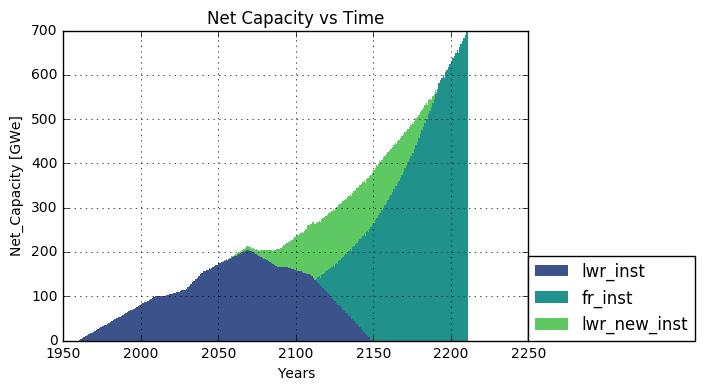

In [13]:
# Display Net Capacity vs Time
from IPython.display import Image
Image(filename='power_plot.png')


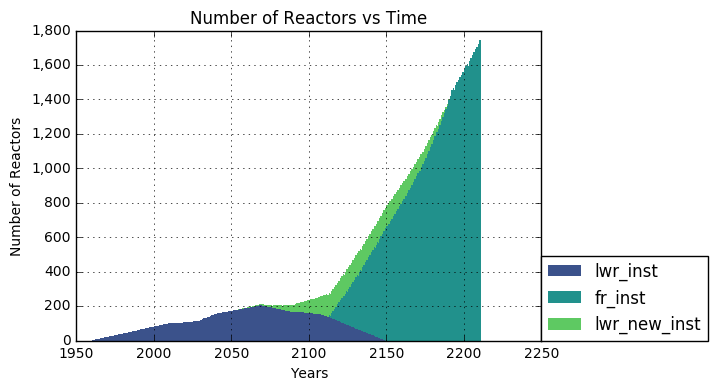

In [14]:

# Display Number of Reactors vs Time
from IPython.display import Image
Image(filename='num_plot.png')


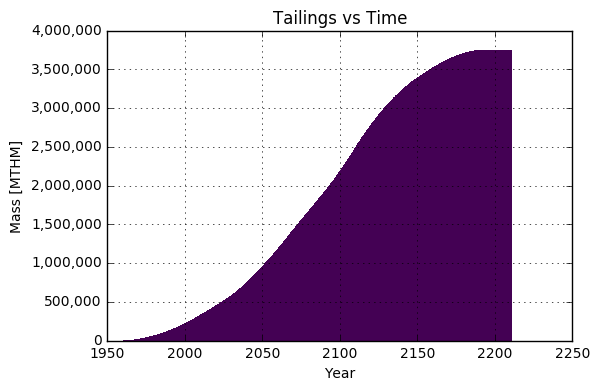

In [15]:

# Display Tailings vs Time
from IPython.display import Image
Image(filename='tailings.png')


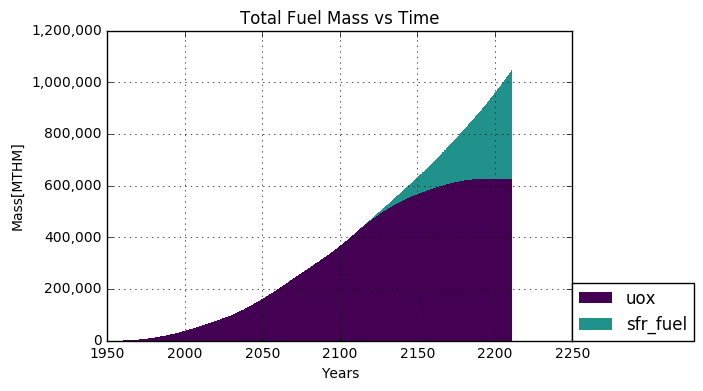

In [16]:

# Display Total Fuel vs Time
from IPython.display import Image
Image(filename='total_fuel.png')


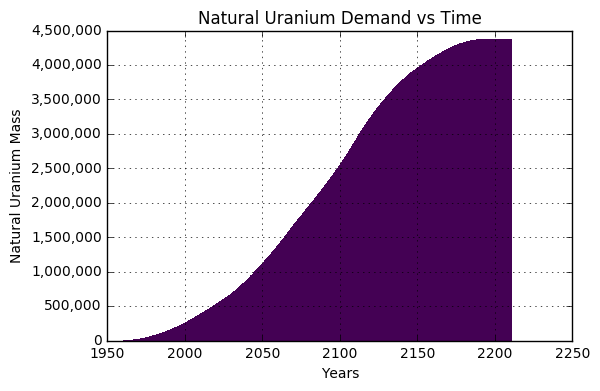

In [17]:

# Display Natural Uranium vs Time
from IPython.display import Image
Image(filename='nat_u.png')

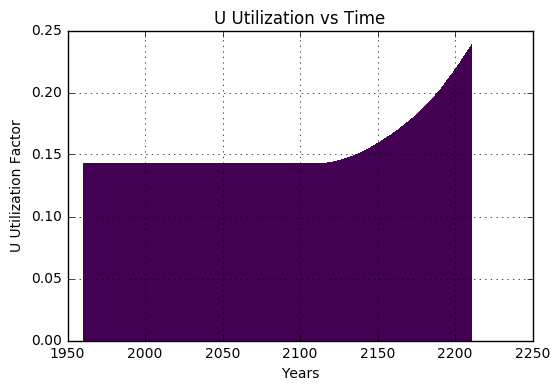

In [18]:

# Display Uranium Utilization vs Time
from IPython.display import Image
Image(filename='u_util.png')


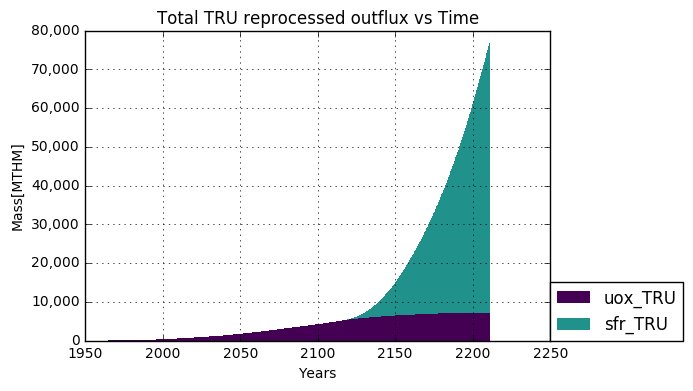

In [19]:

# Display Separated Pu Flow
from IPython.display import Image
Image(filename='combined.png')


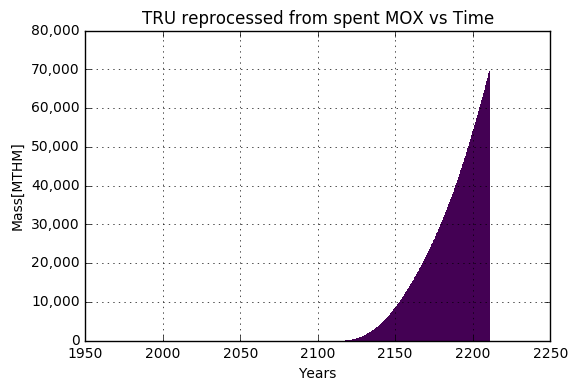

In [20]:

from IPython.display import Image
Image(filename='from_spent_mox.png')


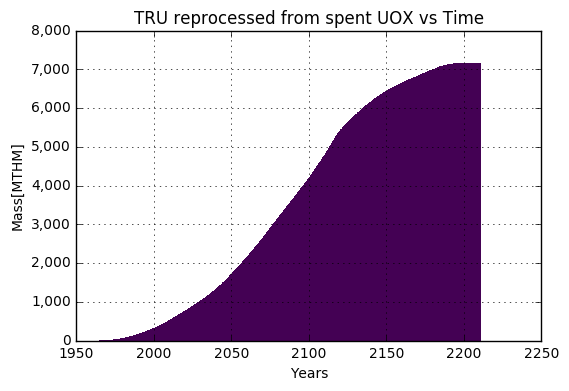

In [21]:

from IPython.display import Image
Image(filename='from_spent_uox.png')